In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.sample(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
731,46,M,ASY,120,249,0,LVH,144,N,0.8,Up,1
872,55,M,ASY,132,353,0,Normal,132,Y,1.2,Flat,1
623,60,M,ASY,140,293,0,LVH,170,N,1.2,Flat,1
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1


In [4]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [5]:
df.Sex=df.Sex.replace({'M':1,'F':-1})

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

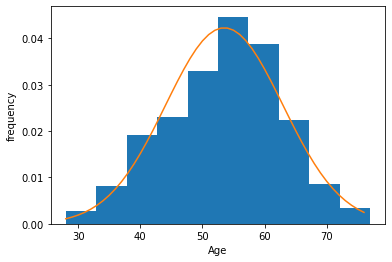

In [20]:
plt.hist(df.Age,density=True)
rng=np.arange(df.Age.min(),df.Age.max(),1)
plt.plot(rng,norm.pdf(rng,df.Age.mean(),df.Age.std()))
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

In [21]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

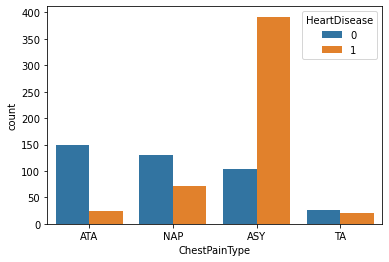

In [24]:
sns.countplot(x='ChestPainType',data=df,hue='HeartDisease')

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

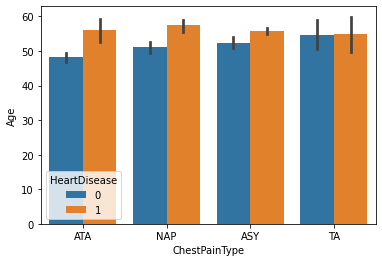

In [27]:
sns.barplot(x='ChestPainType',
    y='Age',
    data=df,hue='HeartDisease')

In [28]:
df.RestingBP.describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [29]:
df[df.RestingBP==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [32]:
df.loc[df[df.RestingBP==0].index,'RestingBP']=np.nan

In [33]:
df.RestingBP.describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

<AxesSubplot:>

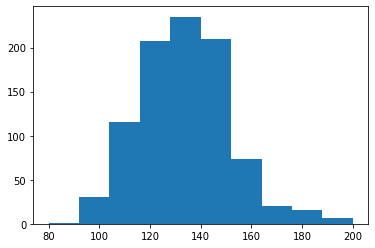

In [34]:
df.RestingBP.hist(grid=False)

In [35]:
df.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [36]:
df[df.Cholesterol==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,ASY,115.0,0,0,Normal,93,Y,0.0,Flat,1
294,32,1,TA,95.0,0,1,Normal,127,N,0.7,Up,1
295,61,1,ASY,105.0,0,1,Normal,110,Y,1.5,Up,1
296,50,1,ASY,145.0,0,1,Normal,139,Y,0.7,Flat,1
297,57,1,ASY,110.0,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,ASY,122.0,0,0,Normal,120,N,0.5,Up,1
515,63,1,NAP,130.0,0,1,ST,160,N,3.0,Flat,0
518,48,1,NAP,102.0,0,1,ST,110,Y,1.0,Down,1
535,56,1,ASY,130.0,0,0,LVH,122,Y,1.0,Flat,1


In [37]:
df.FastingBS.describe()

count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

In [39]:
df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

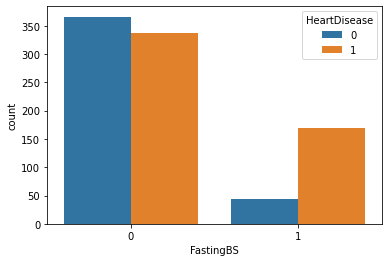

In [41]:
sns.countplot(x='FastingBS',data=df,hue='HeartDisease')

In [40]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

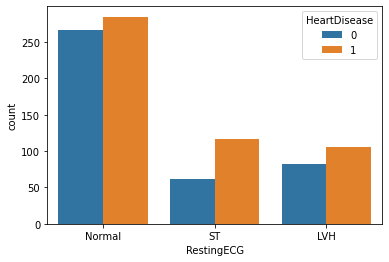

In [42]:
sns.countplot(x='RestingECG',data=df,hue='HeartDisease')

In [43]:
df.MaxHR.describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

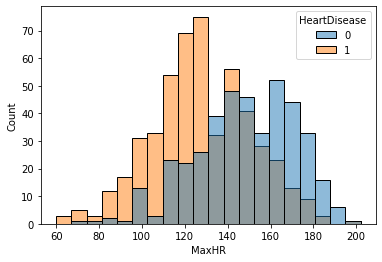

In [45]:
sns.histplot(x='MaxHR',data=df,hue='HeartDisease')

In [46]:
df.sample(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
393,38,1,ASY,150.0,0,1,Normal,120,Y,0.7,Flat,1
58,54,1,ASY,150.0,365,0,ST,134,N,1.0,Up,0
649,50,1,ASY,144.0,200,0,LVH,126,Y,0.9,Flat,1
428,62,1,ASY,110.0,0,0,Normal,120,Y,0.5,Flat,1


In [47]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [48]:
df.ExerciseAngina=df.ExerciseAngina.replace({'N':-1,'Y':1})

In [50]:
df.Oldpeak.describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

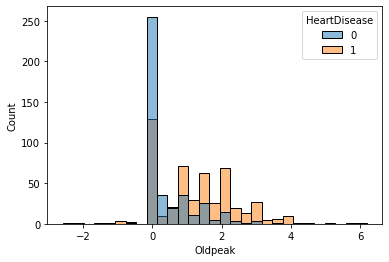

In [51]:
sns.histplot(x='Oldpeak',data=df,hue='HeartDisease')

In [52]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

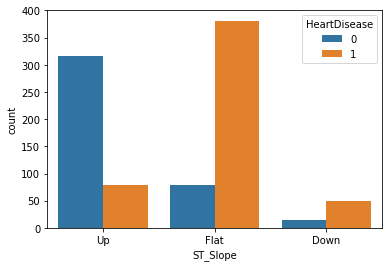

In [53]:
sns.countplot(x='ST_Slope',data=df,hue='HeartDisease')

In [54]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [55]:
df1=df.dropna()

In [70]:
df2=pd.get_dummies(df1,drop_first=True)
df2.drop('HeartDisease',axis=1,inplace=True)
df2['HeartDisease']=df1.HeartDisease

<AxesSubplot:>

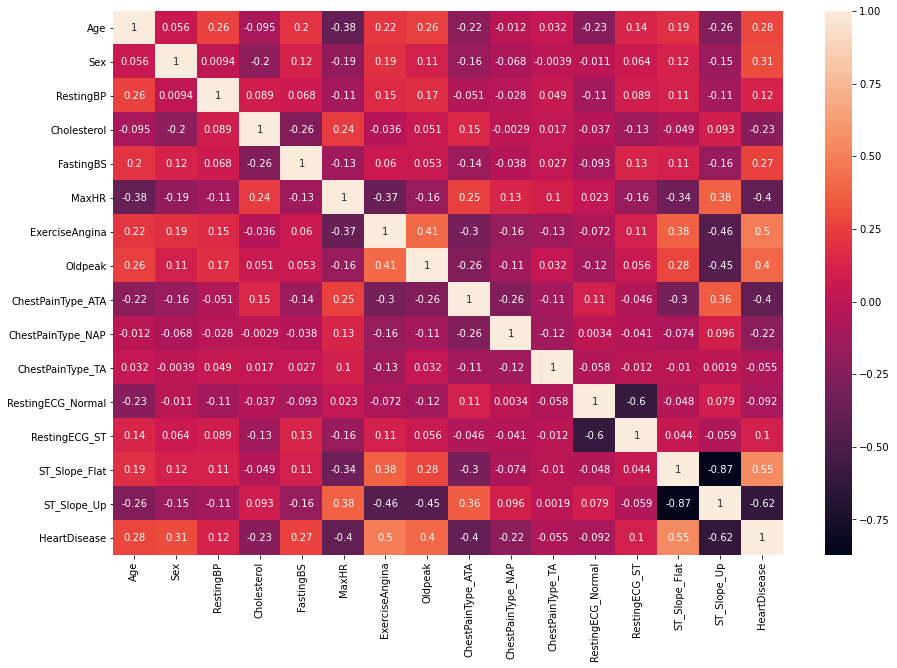

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [67]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [72]:

X = df2.drop('HeartDisease',axis=1)
y = df2.HeartDisease
bestfeatures = SelectKBest(score_func=mutual_info_regression,k=10)
fit = bestfeatures.fit(X,y)
dbest= pd.DataFrame(fit.scores_,columns=['score'])
dbest['col_nam']= pd.DataFrame(X.columns)
dbest.sort_values(by='score',ascending=False,inplace=True)
dbest

,score,col_nam
14,0.190345,ST_Slope_Up
13,0.170738,ST_Slope_Flat
7,0.164901,Oldpeak
6,0.156844,ExerciseAngina
8,0.123481,ChestPainType_ATA
5,0.095693,MaxHR
3,0.061730,Cholesterol
1,0.054584,Sex
0,0.046889,Age
2,0.045713,RestingBP


In [69]:
X.isna().sum()

Age                  0
Sex                  0
RestingBP            1
Cholesterol          0
FastingBS            0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [87]:
models_sales=[RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier()
            ,KNeighborsClassifier(n_neighbors=3),LogisticRegression(),GaussianNB()]

score_sales=[]
for model in models_sales:
    score_sales.append(cross_val_score(model,X,y,n_jobs=-1).mean())
pd.DataFrame(score_sales,index=models_sales).sort_values(by=0,ascending=False)

,0
GaussianNB(),0.836339
LogisticRegression(),0.835311
RandomForestClassifier(),0.825440
GradientBoostingClassifier(),0.822149
DecisionTreeClassifier(),0.724050
KNeighborsClassifier(n_neighbors=3),0.647719
